# Exploratory Data Analysis: TDS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in cleaned file
filename = '../data/tds_cleaned.csv'

In [3]:
df = pd.read_csv(filename)

In [4]:
df.head() 

,date,title,subtitle,claps,responses,author_url,story_url,reading_time (mins),number_sections,section_titles,number_paragraphs,paragraphs
0,01/01/2021,7 Most Recommended Skills to Learn in 2021 to ...,Recommended by some of the largest…,1000,10,https://towardsdatascience.com/@terenceshin,https://towardsdatascience.com/7-most-recommen...,6,11,['7 Most Recommended Skills to Learn in 2021 t...,36,"['Terence Shin', 'Jan 1·6 min read', 'Happy Ne..."
1,01/01/2021,The Ultimate Guide to Acing Coding Interviews ...,Data Science Interview,489,4,https://towardsdatascience.com/@emmading,https://towardsdatascience.com/the-ultimate-gu...,11,12,['The Ultimate Guide to Acing Coding Interview...,42,"['Emma Ding', 'Jan 1·11 min read', 'Written by..."
2,01/01/2021,Shakespeare versus Eminem— who’s the better ly...,"He is known for his poetry, his writings on life…",139,2,https://towardsdatascience.com/@jeroenvanzeeland,https://towardsdatascience.com/shakespeare-ver...,9,13,['Shakespeare versus Eminem—who’s the better l...,64,"['Jeroen van Zeeland', 'Jan 1·9 min read', 'Da..."
3,01/01/2021,Customer Segmentation in Online Retail,A detailed step-by-step explanation on perform...,159,1,https://towardsdatascience.com/@rahulkhandelwal,https://towardsdatascience.com/customer-segmen...,19,15,"['Customer Segmentation in Online Retail', 'Un...",93,"['Rahul Khandelwal', 'Jan 1·19 min read', 'In ..."
4,01/01/2021,Implementing VisualTtransformer in PyTorch,"Hi guys, happy new year! Today we are going to...",133,2,https://towardsdatascience.com/@FrancescoZ,https://towardsdatascience.com/implementing-vi...,6,6,['Implementing Vision Transformer (ViT) in PyT...,60,"['Francesco Zuppichini', 'Jan 1·6 min read', '..."


In [5]:
df.columns

Index(['date', 'title', 'subtitle', 'claps', 'responses', 'author_url',
       'story_url', 'reading_time (mins)', 'number_sections', 'section_titles',
       'number_paragraphs', 'paragraphs'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 9804 non-null   object
 1   title                9804 non-null   object
 2   subtitle             9804 non-null   object
 3   claps                9804 non-null   int64 
 4   responses            9804 non-null   object
 5   author_url           9804 non-null   object
 6   story_url            9804 non-null   object
 7   reading_time (mins)  9804 non-null   int64 
 8   number_sections      9804 non-null   int64 
 9   section_titles       9804 non-null   object
 10  number_paragraphs    9804 non-null   int64 
 11  paragraphs           9804 non-null   object
dtypes: int64(4), object(8)
memory usage: 919.2+ KB


In [7]:
df.isnull().sum()

date                   0
title                  0
subtitle               0
claps                  0
responses              0
author_url             0
story_url              0
reading_time (mins)    0
number_sections        0
section_titles         0
number_paragraphs      0
paragraphs             0
dtype: int64

In [8]:
df.duplicated().sum()

0

#### Explore Proposed Target Variable: 'claps'

In [9]:
df['claps'].value_counts()

10     154
11     154
5      151
13     147
12     140
      ... 
436      1
412      1
380      1
372      1
999      1
Name: claps, Length: 674, dtype: int64

In [10]:
(df['claps'] == 0).sum()

62

In [11]:
df.describe()

,claps,reading_time (mins),number_sections,number_paragraphs
count,9804.000000,9804.000000,9804.000000,9804.000000
mean,113.665341,7.357813,5.210832,36.803142
std,215.470121,3.981760,3.901773,22.146941
min,0.000000,1.000000,0.000000,0.000000
25%,19.000000,5.000000,1.000000,23.000000
50%,55.000000,6.000000,5.000000,32.000000
75%,124.000000,9.000000,7.000000,45.000000
max,4800.000000,53.000000,102.000000,456.000000


In [12]:
# #was not able to simply convert 'astype(int)' - noticed the character K - here's what we'll need to 
# # fix in the cleaning steps

# #commenting out as this EDA now uses a cleaned version
# K_claps = [df['claps'][row] for row in df[df['claps'].str.contains('K')].index]


In [13]:
# a function to convert K claps to an integer
def replace_K(string_in): 
    if string_in.count('K') >0:
        return int((float(string_in.replace('K', '')) * 1000))
    else: 
        return int(string_in)

In [14]:
# # convert K claps to integer
# df['claps'] = df['claps'].apply(replace_K)

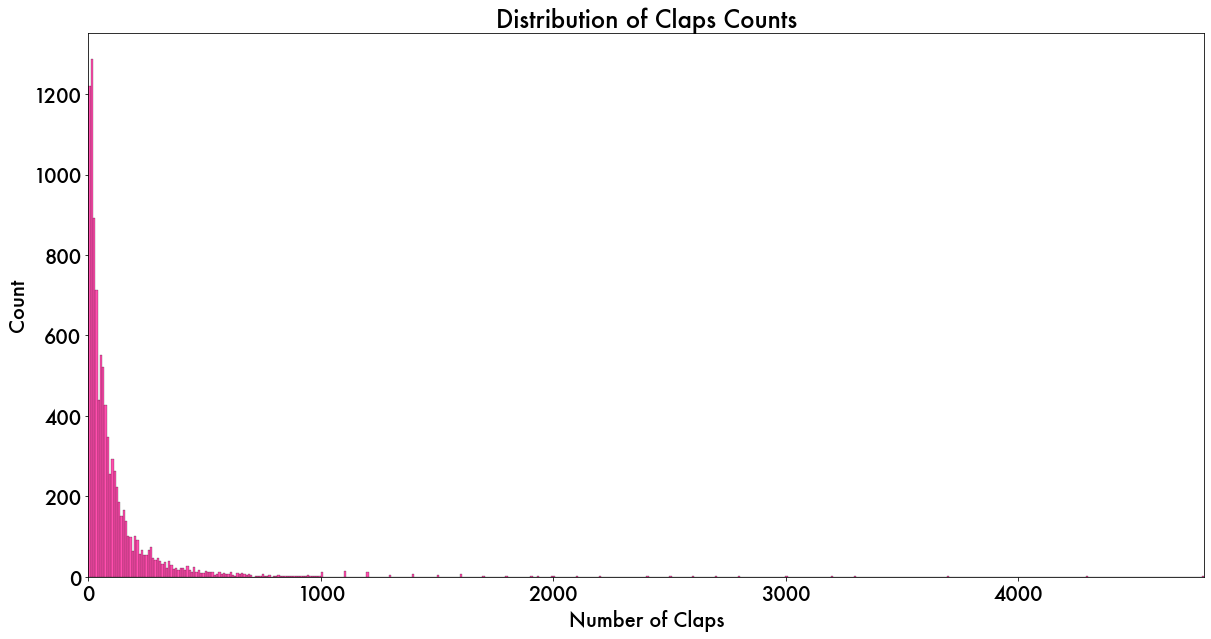

In [15]:
#Look at the distribution of the citation counts
plt.figure(figsize = (20, 10));
sns.histplot(data=df, x='claps', color='deeppink');
figurefont = {'fontname' : 'Futura'};
plt.title('Distribution of Claps Counts', fontsize = 24,**figurefont );
plt.xticks(**figurefont, fontsize = 20);
plt.yticks(**figurefont, fontsize = 20);
plt.xlabel('Number of Claps',**figurefont, fontsize = 20);
plt.ylabel('Count',**figurefont, fontsize = 20);
plt.xlim(0,max(df['claps']))
plt.savefig('../figures/tds_claps_histplot.jpg',  bbox_inches = "tight")

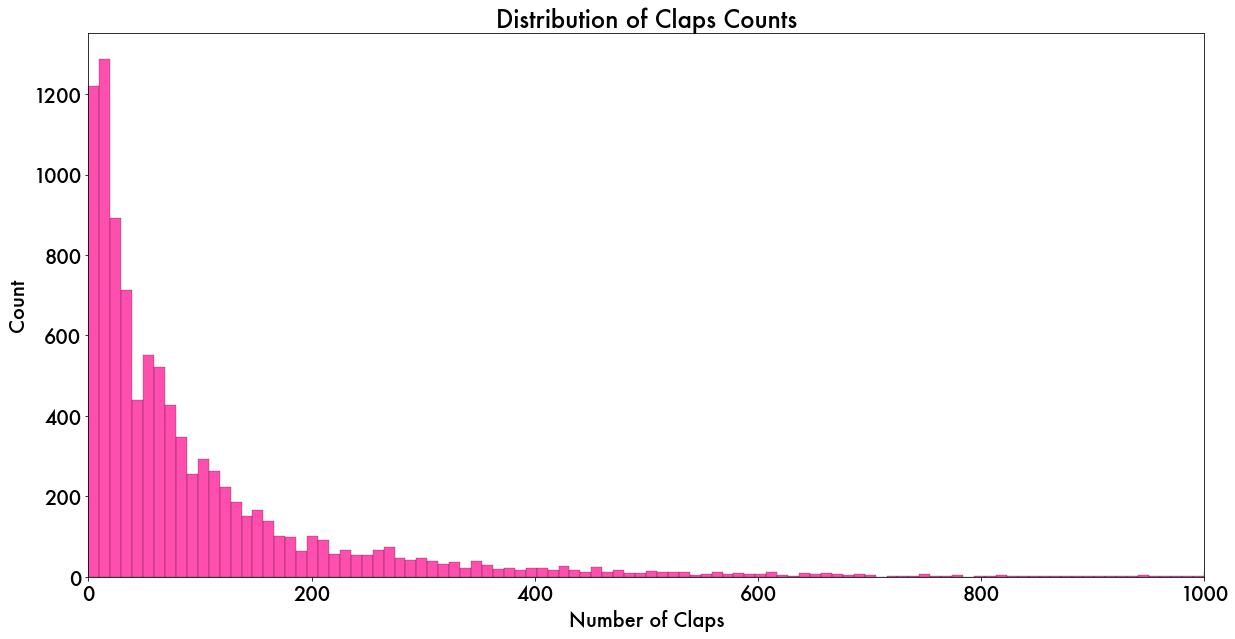

In [16]:
#Look at the distribution of the citation counts
plt.figure(figsize = (20, 10));
sns.histplot(data=df, x='claps', color='deeppink');
figurefont = {'fontname' : 'Futura'};
plt.title('Distribution of Claps Counts', fontsize = 24,**figurefont );
plt.xticks(**figurefont, fontsize = 20);
plt.yticks(**figurefont, fontsize = 20);
plt.xlabel('Number of Claps',**figurefont, fontsize = 20);
plt.ylabel('Count',**figurefont, fontsize = 20);
plt.xlim(0,1000)
plt.savefig('../figures/tds_claps_histplot_zoom.jpg',  bbox_inches = "tight")

In [17]:
#the target variable is right-skewed, will need to remove outliers since log transform isn't an option
df['claps'].skew()

7.723267486730763

### Explore Relationships with Target Variable

#### Is the length of the post correlated with the target variable?

In [18]:
#check out some preliminary correlations
df['len_paragraphs']=df['paragraphs'].apply(len)

stats.pearsonr(df['claps'],df['len_paragraphs'])

(0.06307644607307701, 4.079574710178586e-10)

Very very weak but significant positive correlation. 

In [19]:
#check out some preliminary correlations
df['len_title']=df['title'].apply(len)
stats.pearsonr(df['claps'],df['len_title'])

(-0.01490204432947666, 0.1400991407710555)

Claps do not appear correlated with the length of the title.

### Is there an effect of time on # of claps?

In [20]:
# convert date column to datetime object
df['date'] = pd.to_datetime(df['date'])

In [21]:
#sort the df in reverse chronological order
df.sort_values('date', inplace=True)

In [22]:
# create a new column that shows how long the posts had been live as of when they were pulled

df['days_live'] = (pd.to_datetime('2021-05-01') - df['date']).dt.days

In [23]:
# look at the correlation 
stats.pearsonr(df['claps'],df['days_live'])

(0.03227611445741467, 0.0013922665301480998)

The length of time that a post has been live does not appear to have a meaningful effect on the number of claps. This is good, so I won't need to account for its effect later on in the analysis. 

#### Explore responses column

In [24]:
df['responses'].value_counts()

0 responses    6446
1              1935
2               704
3               302
4               154
5                83
6                40
7                37
8                27
12               10
10               10
9                10
11                7
17                6
14                5
13                4
16                3
15                3
19                3
18                2
41                2
23                1
27                1
104               1
24                1
30                1
26                1
31                1
25                1
29                1
54                1
69                1
Name: responses, dtype: int64

In [25]:
df['responses'].replace('0 responses', 0, inplace=True)

In [26]:
df['responses'] = df['responses'].astype(int)

In [27]:
df['responses'].value_counts()

0      6446
1      1935
2       704
3       302
4       154
5        83
6        40
7        37
8        27
9        10
10       10
12       10
11        7
17        6
14        5
13        4
15        3
19        3
16        3
18        2
41        2
27        1
26        1
29        1
69        1
25        1
104       1
30        1
54        1
24        1
23        1
31        1
Name: responses, dtype: int64

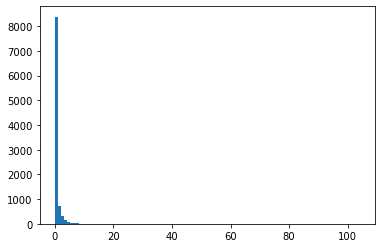

In [28]:
#Look at the distribution of the responses
plt.hist(df['responses'], bins=100);

Most of the posts have zero responses, and the ones that do have very few. I don't think I'll be using this variable. 

In [29]:
df.describe()

,claps,responses,reading_time (mins),number_sections,number_paragraphs,len_paragraphs,len_title,days_live
count,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000
mean,113.665341,0.746226,7.357813,5.210832,36.803142,7756.898817,51.208690,115.552122
std,215.470121,2.255771,3.981760,3.901773,22.146941,5221.143710,17.505928,59.314286
min,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000
25%,19.000000,0.000000,5.000000,1.000000,23.000000,4708.750000,38.000000,68.000000
50%,55.000000,0.000000,6.000000,5.000000,32.000000,6633.500000,50.000000,118.000000
75%,124.000000,1.000000,9.000000,7.000000,45.000000,9403.000000,62.000000,166.000000
max,4800.000000,104.000000,53.000000,102.000000,456.000000,78023.000000,118.000000,212.000000


### Remove Outliers

In [30]:
#check out outliers (posts that are three standard deviations above the mean)

In [31]:
num_columns = ['number_paragraphs', 'reading_time (mins)', 'number_sections', 'claps']

In [32]:
for col in num_columns: 
    print(f'{col} has {(df[col] > (df[col].mean()+(3*df[col].std()))).sum()} outliers.')

number_paragraphs has 146 outliers.
reading_time (mins) has 137 outliers.
number_sections has 115 outliers.
claps has 144 outliers.


In [33]:
df.shape

(9804, 15)

In [34]:
#drop outliers

for col in num_columns:
    df = df[(df[col] <= ((df[col].mean())+(3*(df[col].std()))))]

In [35]:
df.shape

(9290, 15)

In [36]:
df['claps'].skew()

2.4110594299355377

The skew has improved following outlier removal

In [37]:
df.describe()

,claps,responses,reading_time (mins),number_sections,number_paragraphs,len_paragraphs,len_title,days_live
count,9290.000000,9290.000000,9290.000000,9290.000000,9290.000000,9290.000000,9290.000000,9290.000000
mean,92.826695,0.607535,6.874489,4.951884,34.413132,7163.691819,51.199139,115.400646
std,116.085128,1.243568,2.745526,3.346651,16.492052,3572.761414,17.403025,59.189190
min,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000
25%,18.000000,0.000000,5.000000,1.000000,23.000000,4637.500000,38.000000,68.000000
50%,53.000000,0.000000,6.000000,5.000000,31.000000,6473.000000,50.000000,117.000000
75%,117.000000,1.000000,8.000000,7.000000,43.000000,9010.750000,62.000000,166.000000
max,747.000000,17.000000,16.000000,16.000000,103.000000,25530.000000,118.000000,212.000000


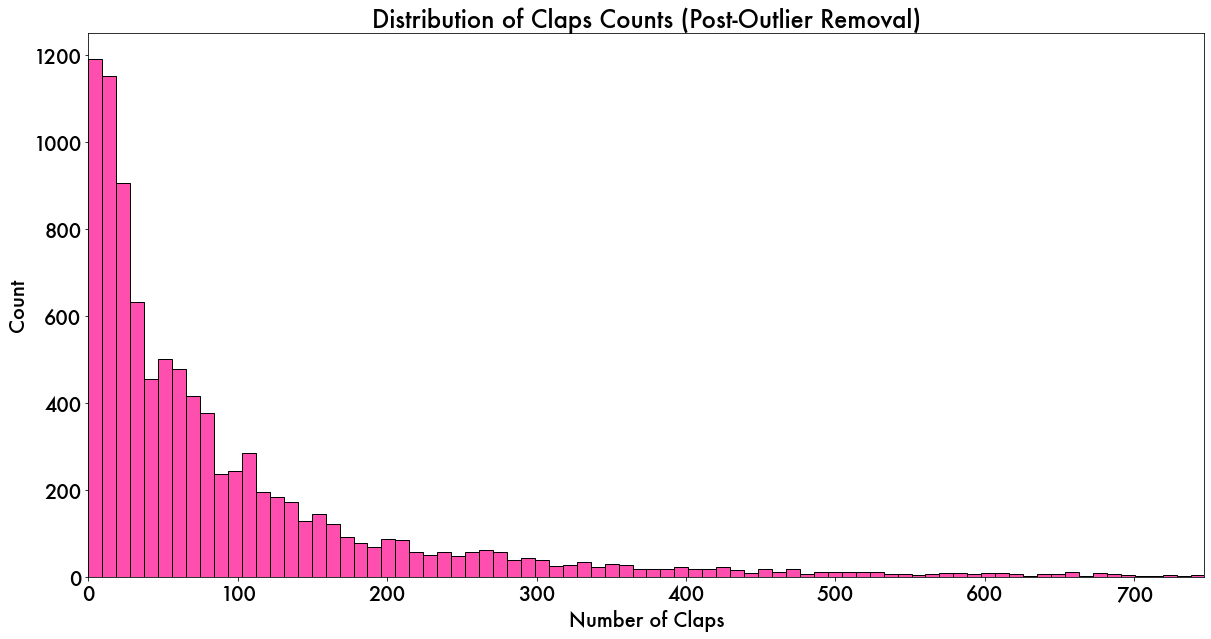

In [41]:
#Look at the distribution of the citation counts
plt.figure(figsize = (20, 10));
sns.histplot(data=df, x='claps', color='deeppink');
figurefont = {'fontname' : 'Futura'};
plt.title('Distribution of Claps Counts (Post-Outlier Removal)', fontsize = 24,**figurefont );
plt.xticks(**figurefont, fontsize = 20);
plt.yticks(**figurefont, fontsize = 20);
plt.xlabel('Number of Claps',**figurefont, fontsize = 20);
plt.ylabel('Count',**figurefont, fontsize = 20);
plt.xlim(0,max(df['claps']))
plt.savefig('../figures/tds_claps_histplot_no_outliers.jpg',  bbox_inches = "tight")

In [39]:
df.to_csv('../data/tds_cleaned_no_outliers.csv')

In [40]:
#if I want to turn this into a clf problem and use all posts with claps greater than 1 std above the mean....what would that look like?
sum(df['claps'] > df['claps'].mean() + df['claps'].std())

1122